In [1]:
import numpy as np
from my_einops import rearrange # Use the filename you saved

print("Module imported successfully!")


Module imported successfully!


In [2]:
# Example usage
my_tensor = np.arange(12).reshape(3, 4)
print("Original shape:", my_tensor.shape)

# Call your implemented rearrange function
rearranged_tensor = rearrange(my_tensor, 'h w -> w h')

print("Rearranged shape:", rearranged_tensor.shape)
print("Rearranged tensor:\n", rearranged_tensor)

Original shape: (3, 4)
Rearranged shape: (4, 3)
Rearranged tensor:
 [[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


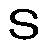

In [3]:
import numpy as np
from PIL.Image import fromarray
from IPython import get_ipython

def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print("<array of shape {}>".format(obj.shape))

    ip = get_ipython()
    ip.display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    ip.display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)
    
# Register the custom display formatters
ims = np.load("sarvam.npy", allow_pickle=False)
display_np_arrays_as_images()

# Now, displaying an image (e.g., the first image) in a Jupyter cell:
ims[0]


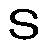

In [4]:
ims[0]

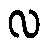

In [5]:
from my_einops import rearrange
## Functionality One - Transposing the first two axes
rearrange(ims[0],"h w c -> w h c") 

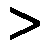

In [6]:
rearrange(ims[3], "height width color -> width height color")

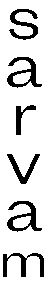

In [7]:
rearrange(ims, "b h w c -> (b h) w c")

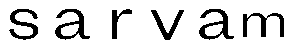

In [8]:
# or compose a new dimension of batch and width
rearrange(ims, "b h w c -> h (b w) c")

In [9]:
# resulting dimensions are computed very simply
# length of newly composed axis is a product of components
# [6, 96, 96, 3] -> [96, (6 * 96), 3]
rearrange(ims, "b h w c -> h (b w) c").shape

(48, 288, 3)

In [10]:
# we can compose more than two axes.
# let's flatten 4d array into 1d, resulting array has as many elements as the original
rearrange(ims, "b h w c -> (b h w c)").shape

(41472,)

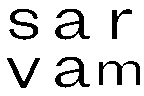

In [11]:
# finally, combine composition and decomposition:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)

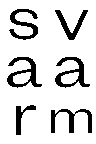

In [12]:
# slightly different composition: b1 is merged with width, b2 with height
# ... so letters are ordered by w then by h
rearrange(ims, "(b1 b2) h w c -> (b2 h) (b1 w) c ", b1=2)

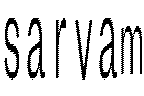

In [13]:
# move part of width dimension to height.
# we should call this width-to-height as image width shrunk by 2 and height doubled.
# but all pixels are the same!
# Can you write reverse operation (height-to-width)?
rearrange(ims, "b h (w w2) c -> (h w2) (b w) c", w2=2)

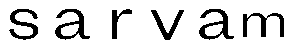

In [14]:
# compare with the next example
rearrange(ims, "b h w c -> h (b w) c")

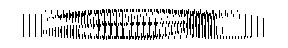

In [15]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant,
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, "b h w c -> h (w b) c")

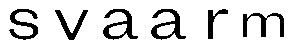

In [16]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, "(b1 b2) h w c -> h (b1 b2 w) c ", b1=2)  # produces 'einops'
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c ", b1=2)  # produces 'eoipns'

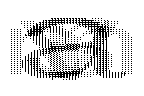

In [17]:
# interweaving pixels of different pictures
# all letters are observable
rearrange(ims, "(b1 b2) h w c -> (h b1) (w b2) c ", b1=2)

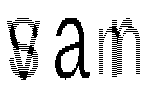

In [18]:
# interweaving along vertical for couples of images
rearrange(ims, "(b1 b2) h w c -> (h b1) (b2 w) c", b1=2)

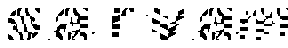

In [19]:
# split in small patches and transpose each patch
rearrange(ims, "b (h1 h2) (w1 w2) c -> (h1 w2) (b w1 h2) c", h2=8, w2=8)

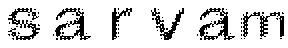

In [20]:
# stop me someone!
rearrange(ims, "b (h1 h2 h3) (w1 w2 w3) c -> (h1 w2 h3) (b w1 h2 w3) c", h2=2, w2=2, w3=2, h3=2)

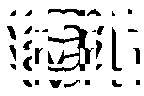

In [21]:
rearrange(ims, "(b1 b2) (h1 h2) (w1 w2) c -> (h1 b1 h2) (w1 b2 w2) c", h1=3, w1=3, b2=3)

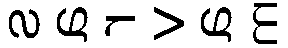

In [22]:
rearrange(ims, "b h w c -> w (b h) c")

In [23]:
x = np.random.rand(3, 4)
result = rearrange(x, 'h w -> w h')
print(result)

[[0.13241536 0.89213923 0.68571142]
 [0.2337037  0.14279243 0.9284573 ]
 [0.61156203 0.46747325 0.79544659]
 [0.91299048 0.10079368 0.96504505]]


In [24]:
x = np.random.rand(12, 10)
result = rearrange(x, '(h w) c -> h w c', h=3)
print(result)

[[[0.1842499  0.11415327 0.93943573 0.86196486 0.72531685 0.70437742
   0.22086669 0.82569253 0.23590978 0.87621279]
  [0.48761367 0.74544847 0.64324807 0.77166987 0.49935323 0.34869212
   0.55923041 0.9987596  0.90958237 0.14989943]
  [0.68463192 0.34142178 0.90521199 0.17582761 0.08283767 0.58797426
   0.98825101 0.16012251 0.55129145 0.67420879]
  [0.36527218 0.89953999 0.33763768 0.7324933  0.6619461  0.96889727
   0.73999788 0.76565163 0.44173585 0.27706568]]

 [[0.04784287 0.5150579  0.02080107 0.15292155 0.37394667 0.21457968
   0.07949159 0.14677045 0.12710075 0.65964911]
  [0.04802899 0.44154921 0.79617883 0.23447888 0.49258927 0.95969155
   0.63972687 0.48413715 0.63710013 0.53195658]
  [0.70794356 0.42105265 0.62565281 0.13795955 0.06133728 0.91083628
   0.98606215 0.04350723 0.12361933 0.2722939 ]
  [0.97895308 0.35657098 0.90728561 0.18629311 0.70856965 0.83512426
   0.2318108  0.19787645 0.86143237 0.23336517]]

 [[0.91187995 0.38137035 0.82062507 0.02341501 0.50870448 0.

In [25]:
x = np.random.rand(3, 4, 5)
result = rearrange(x, 'a b c -> (a b) c')
print(result)

[[0.79220098 0.36238549 0.91574426 0.62032128 0.4023016 ]
 [0.60139149 0.82806136 0.1816141  0.59408071 0.7341635 ]
 [0.28572438 0.1437199  0.59362169 0.03655681 0.08842872]
 [0.57855757 0.40091644 0.45329009 0.53388518 0.85284623]
 [0.62772809 0.32350194 0.99852318 0.52706023 0.14000805]
 [0.92835213 0.00815023 0.59411946 0.56252862 0.00888995]
 [0.40683511 0.38113498 0.26863427 0.52313042 0.57596154]
 [0.61837849 0.03983843 0.31399072 0.92793654 0.28533533]
 [0.48673696 0.95078148 0.42916553 0.66011249 0.69717685]
 [0.19548384 0.83978698 0.16728088 0.01416416 0.07969384]
 [0.63393941 0.39635066 0.89121374 0.75908211 0.38892673]
 [0.66583295 0.98529097 0.60033537 0.86801635 0.80211223]]


In [26]:
# Handle batch dimensions
x = np.random.rand(2, 3, 4, 5)
result = rearrange(x, '... h w -> ... (h w)')
print(result)

[[[0.6527275  0.80127118 0.24381931 0.73529146 0.56050726 0.96668472
   0.29273764 0.55977398 0.53768472 0.40212151 0.34732881 0.89845343
   0.90947138 0.86531087 0.1661077  0.97567164 0.96844211 0.1090826
   0.18633356 0.07500396]
  [0.07632721 0.32755081 0.662576   0.2697733  0.24471624 0.78512202
   0.75789206 0.90503336 0.02415273 0.92129392 0.62063052 0.50010957
   0.50948764 0.73151517 0.72553563 0.04915208 0.58829008 0.58687567
   0.76052207 0.02595729]
  [0.24725423 0.52738358 0.89151435 0.1320633  0.68421397 0.34857821
   0.79296972 0.18172662 0.60654907 0.42027998 0.78536919 0.58567968
   0.60163044 0.18398223 0.18065325 0.29342592 0.8372089  0.18631089
   0.11270847 0.33211896]]

 [[0.397371   0.9706066  0.38007447 0.71133471 0.67359986 0.69467139
   0.94980938 0.14043637 0.73784962 0.48872719 0.72866105 0.27581936
   0.71620726 0.5537888  0.84906711 0.90186188 0.78866377 0.44734492
   0.88093126 0.12950085]
  [0.00720036 0.29972812 0.23054004 0.22552009 0.4786715  0.7521273